In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_csv('neighbourhood_data.csv')
districts = pd.read_csv('districts_data_cleaned.csv')
names = list(districts['name'].unique())
train_df = train_df[train_df['neighbourhood'].isin(names)]
counts = train_df['neighbourhood'].value_counts()
count_list = counts[counts > 50].index.tolist()
train_df = train_df[train_df['neighbourhood'].isin(count_list)]


train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df = train_df.astype({'bathrooms': 'int64'})
train_df = train_df.astype({'bedrooms': 'int64'})
train_df = train_df.astype({'interest_level': 'category'})
train_df = train_df.astype({'num_photos': 'int64'})
train_df = train_df.astype({'num_features': 'int64'})
train_df = train_df.astype({'num_description_words': 'int64'})
train_df = train_df.astype({'created_month': 'category'})
train_df = train_df.astype({'created_day': 'category'})
train_df = train_df.astype({'neighbourhood': 'str'})
train_df = train_df.astype({'price': 'float64'})
non_standardized = train_df.copy()
train_df['price'] = (train_df['price'] - train_df['price'].mean()) / train_df['price'].std()
train_df.head()

,bathrooms,bedrooms,interest_level,num_photos,num_features,num_description_words,created_month,created_day,neighbourhood,price
0,1,1,medium,12,7,77,6,16,South Side,-0.065951
1,1,3,medium,5,0,95,6,24,East Williamsburg,-0.039170
2,3,3,low,11,2,205,6,28,Brooklyn Heights,0.132672
4,1,3,high,9,1,60,6,4,Sunset Park,-0.074878
6,2,3,low,8,8,183,6,24,Crown Heights,-0.036939


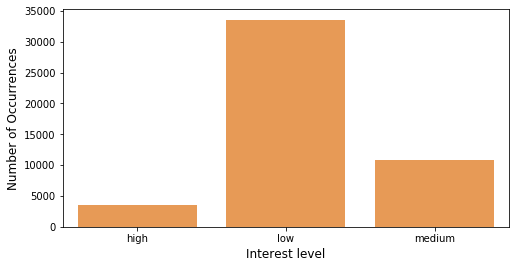

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

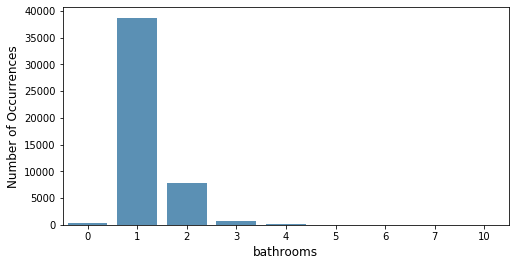

In [4]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

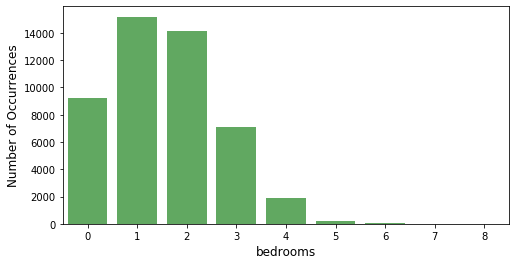

In [5]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

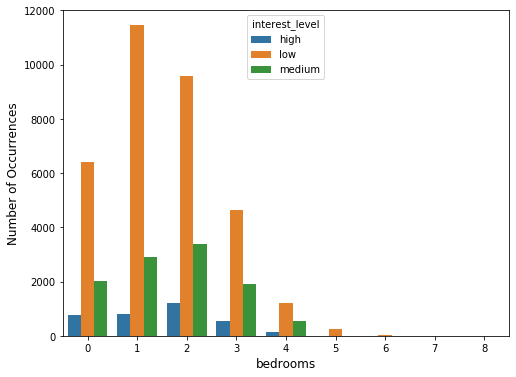

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

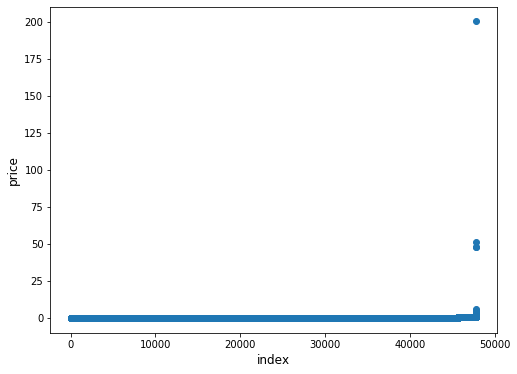

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


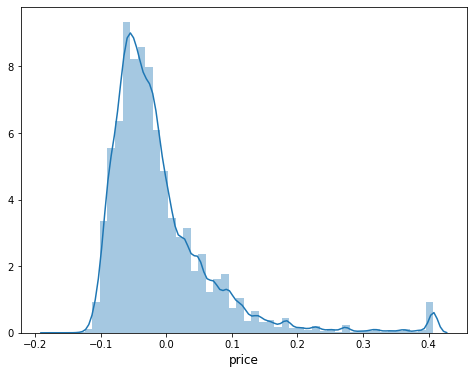

In [8]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [9]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).mean()

In [10]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).std()

In [11]:
grouped = train_df[['price', 'neighbourhood']].groupby('neighbourhood', group_keys=False).apply(pd.DataFrame.sample, 5, replace = True)
print(grouped.groupby(['neighbourhood']).mean())
grouped.groupby(['neighbourhood']).std()

# 101 	4091.498433
# 102 	4151.814392
# 103 	3687.778427
# 104 	3666.281911
# 105 	4277.266374
# 106 	3807.612296
# 107 	4230.897276
# 108 	3647.022048
# 109 	2559.476293
# 110 	2617.046452
# 111 	3071.127291
# 112 	2198.330501
# 164 	4878.125000

                              price
neighbourhood                      
Astoria                   -0.048543
Battery Park City          0.024300
Bay Ridge                 -0.082466
Bedford Stuyvesant        -0.059711
Boerum Hill               -0.027672
Brooklyn Heights          -0.062469
Bushwick                  -0.058809
Carnegie Hill              0.032245
Carroll Gardens            0.012231
Central Harlem            -0.080368
Chelsea                   -0.013684
Chinatown                 -0.020620
Civic Center               0.008142
Clinton                    0.027308
Clinton Hill              -0.028503
Cobble Hill               -0.031047
Crown Heights             -0.056131
Downtown                  -0.023066
Dumbo                      0.031620
East Harlem               -0.045419
East Village              -0.029583
East Williamsburg         -0.053596
Financial District        -0.024102
Flatbush                  -0.042295
Flatiron                   0.021890
Forest Hills              -0

,price
neighbourhood,
Astoria,0.022561
Battery Park City,0.140664
Bay Ridge,0.019811
Bedford Stuyvesant,0.022235
Boerum Hill,0.020560
Brooklyn Heights,0.021436
Bushwick,0.016201
Carnegie Hill,0.076157
Carroll Gardens,0.104555


In [12]:
import scikits.bootstrap as bootstrap 
df = train_df[['price', 'neighbourhood']]
X = df.groupby('neighbourhood').apply(lambda x:bootstrap.ci(x.values, np.mean))
X = X.values
X = np.array(list(X), dtype=np.float)

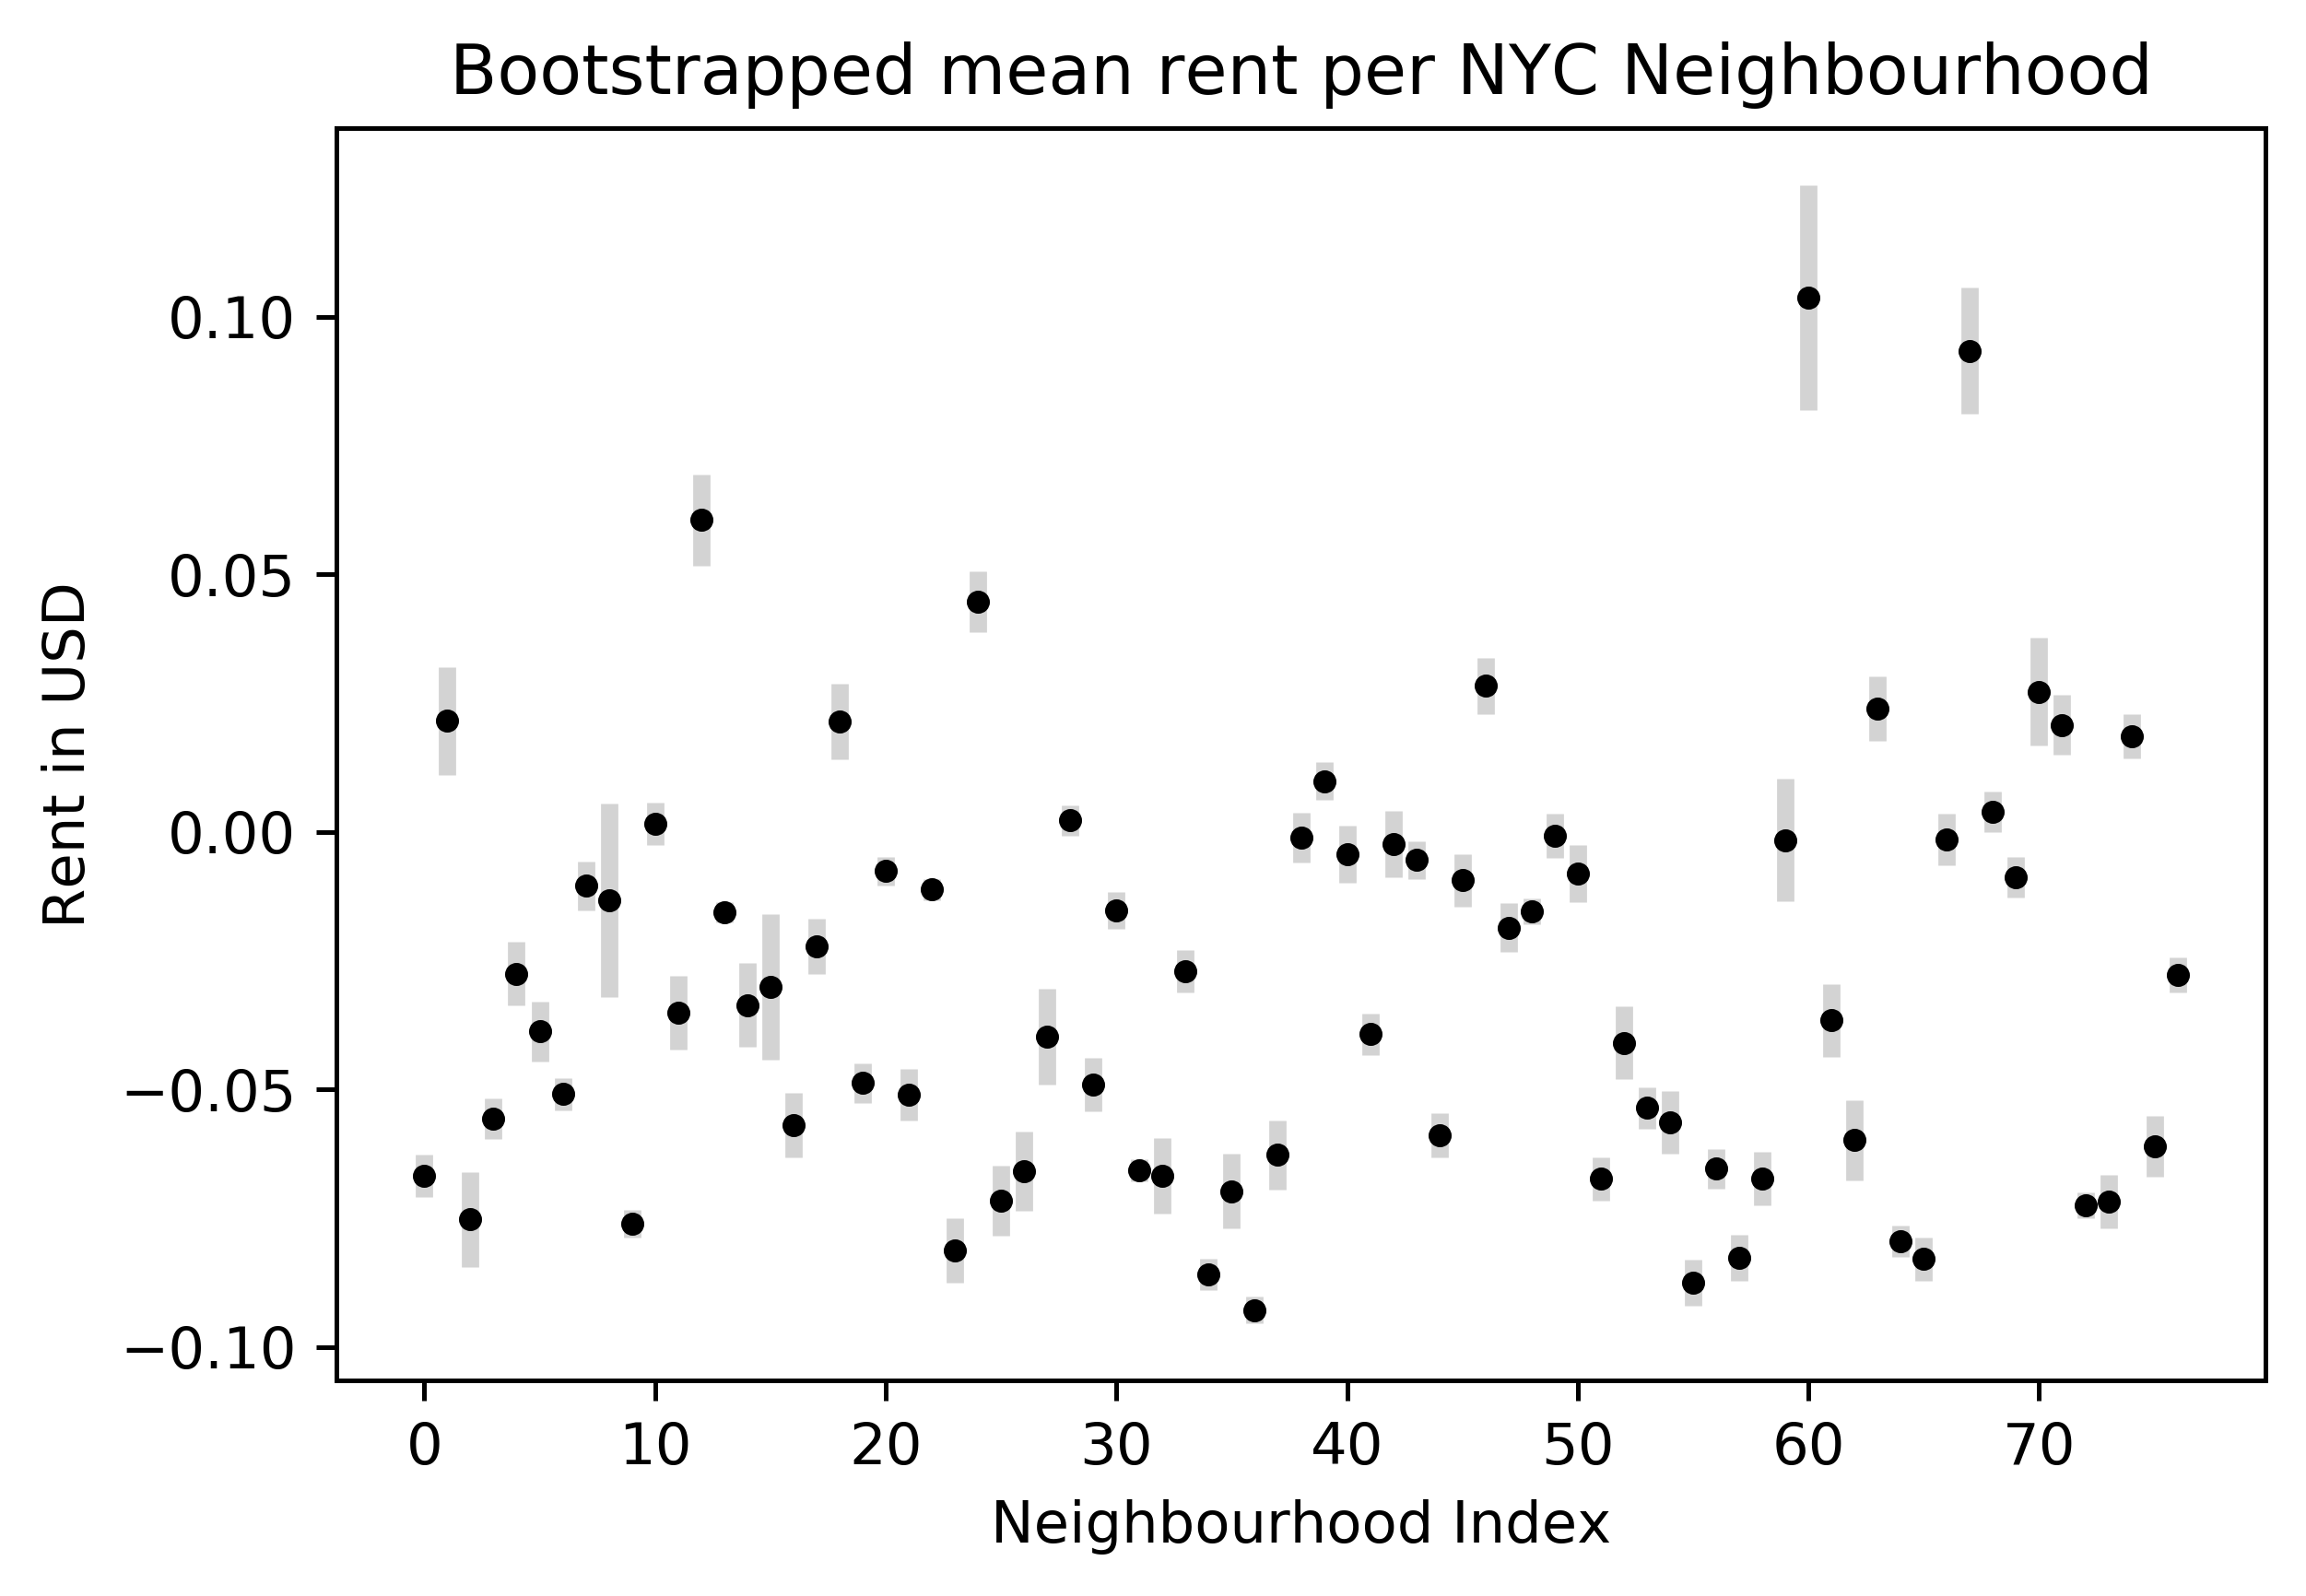

In [13]:
bootstraps = X # All districts

from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

mean = (bootstraps[:,0] + bootstraps[:,1]) / 2
p5 = bootstraps[:,0]
p95 = bootstraps[:,1]

plt.errorbar(
    x = range(bootstraps.shape[0]),
    y = mean,
    yerr=[mean - p5, p95 - mean],
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrapped mean rent per NYC Neighbourhood')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [14]:
# plt.savefig('meanNoPark.png', dpi=450)
print(mean)

[-0.0667852   0.02149875 -0.07522548 -0.05571362 -0.02753495 -0.03877477
 -0.05090626 -0.01050578 -0.01328364 -0.07602403  0.00147476 -0.03507972
  0.06056211 -0.01559698 -0.03360591 -0.03013179 -0.05695942 -0.02226769
  0.02138875 -0.04875873 -0.00760965 -0.05099232 -0.01122393 -0.08126968
  0.04463389 -0.0716039  -0.06586071 -0.03981851  0.00223102 -0.04905388
 -0.01528884 -0.06570722 -0.06680058 -0.02704249 -0.08600026 -0.06976084
 -0.09282647 -0.06274504 -0.0011311   0.00983943 -0.00434124 -0.03931129
 -0.00245742 -0.00548845 -0.05886156 -0.00941933  0.02837011 -0.01863155
 -0.01550215 -0.00071091 -0.0080975  -0.06737248 -0.04094446 -0.05361897
 -0.0564105  -0.08753883 -0.06543673 -0.08269787 -0.06731582 -0.00160659
  0.10369202 -0.03661736 -0.05984612  0.02384924 -0.07953794 -0.08292603
 -0.00151679  0.09338645  0.00387621 -0.00887125  0.02719744  0.02075495
 -0.07252889 -0.07182526  0.01853928 -0.06101499 -0.02776742]


In [15]:
list(train_df)

['bathrooms',
 'bedrooms',
 'interest_level',
 'num_photos',
 'num_features',
 'num_description_words',
 'created_month',
 'created_day',
 'neighbourhood',
 'price']

In [16]:
# Pass 20 properties per node to train set
# Choose 2-3 nodes for training, 2-3 for validation, rest for testing
# Train GCN with labels being the sample average and features of each training instance are bootstrapped from train properties

In [17]:
# df.groupby('b', group_keys=False).apply(pd.DataFrame.sample, frac=.3)
train_df['interest_level'] = pd.Categorical(train_df['interest_level'], categories=train_df['interest_level'].unique()).codes
train_df['neighbourhood'] = pd.Categorical(train_df['neighbourhood'], categories=train_df['neighbourhood'].unique()).codes
train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n=20)

In [18]:
train_samples

bathrooms  bedrooms  interest_level  num_photos  \
neighbourhood                                                          
0             0              1         1               0          12   
              1431           1         2               1          10   
              3624           1         1               1           6   
              3286           1         0               0           4   
              4310           1         2               1          10   
              3746           1         2               1          10   
              1301           1         1               1           9   
              2393           1         1               1           0   
              225            1         2               1           5   
              2762           1         2               1           9   
              3676           1         1               1           9   
              2994           1         1               1           6   
              1705           1         2               1           8   
              3334           1         3               1          10   
              3427           1         1               1           9   
              523            1         2               1           2   
              1624           1         1               1           6   
              3808           1         2               2           6   
              3327           1         0               1           7   
              3520           1         3               1          13   
1             3593           1         3               0           2   
              3246           1         1               1           5   
              3142           2         3               1           5   
              4140           1         2               1          18   
              156            1         1               1           4   
              4255           1         2               1           5   
              3370           1         1               1           4   
              1914           1         0               2           2   
              3680           1         2               1           5   
              1898           1         2               0           5   
...                        ...       ...             ...         ...   
75            47331          1         1               0           9   
              47617          1         2               1           3   
              47796          1         2               1          13   
              46876          1         0               2           5   
              47978          1         0               1           5   
              48793          1         2               2           6   
              47390          1         3               1           5   
              48564          2         3               1           7   
              48656          1         1               0          10   
              47658          1         2               0           6   
76            48338          1         0               2           4   
              46905          1         1               0          15   
              48337          1         1               2          13   
              47655          1         0               1           3   
              48626          1         2               0           6   
              47242          1         2               0           4   
              46908          1         2               1          10   
              47671          1         1               1          17   
              47706          1         0               2           7   
              48811          1         2               0           5   
              48694          1         1               1           8   
              48258          2         2               0          23   
              47578          1         0               2     

In [19]:
train_samples.shape

(1540, 10)

In [20]:
def sampleSet(n = 25, size = 1000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = True)
    train_samples = train_samples.astype({'price': 'float64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(n, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

In [21]:
def train_Set(n = 25):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = False)
    train_samples = train_samples.astype({'price': 'float64'})
    features = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        sample = get_boro.sample(n, replace = True).to_numpy()
        features.append(sample)
    return np.array(features)

In [22]:
X_sets= train_Set()

In [23]:
X_sets.shape

(77, 25, 10)

In [24]:
X_sets[0,0]

array([2, 3, 0, 9, 2, 16, 4, 9, 0, -0.012434278524721414], dtype=object)

In [25]:
X, y = sampleSet()

In [26]:
X_train = X
y_train = y

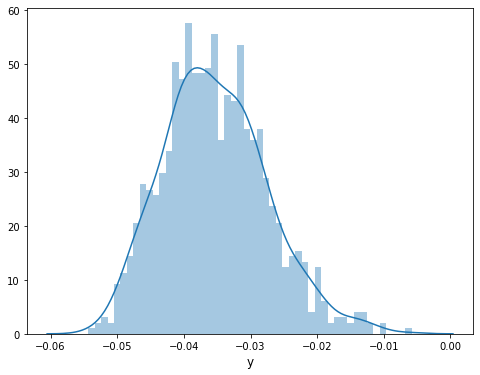

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

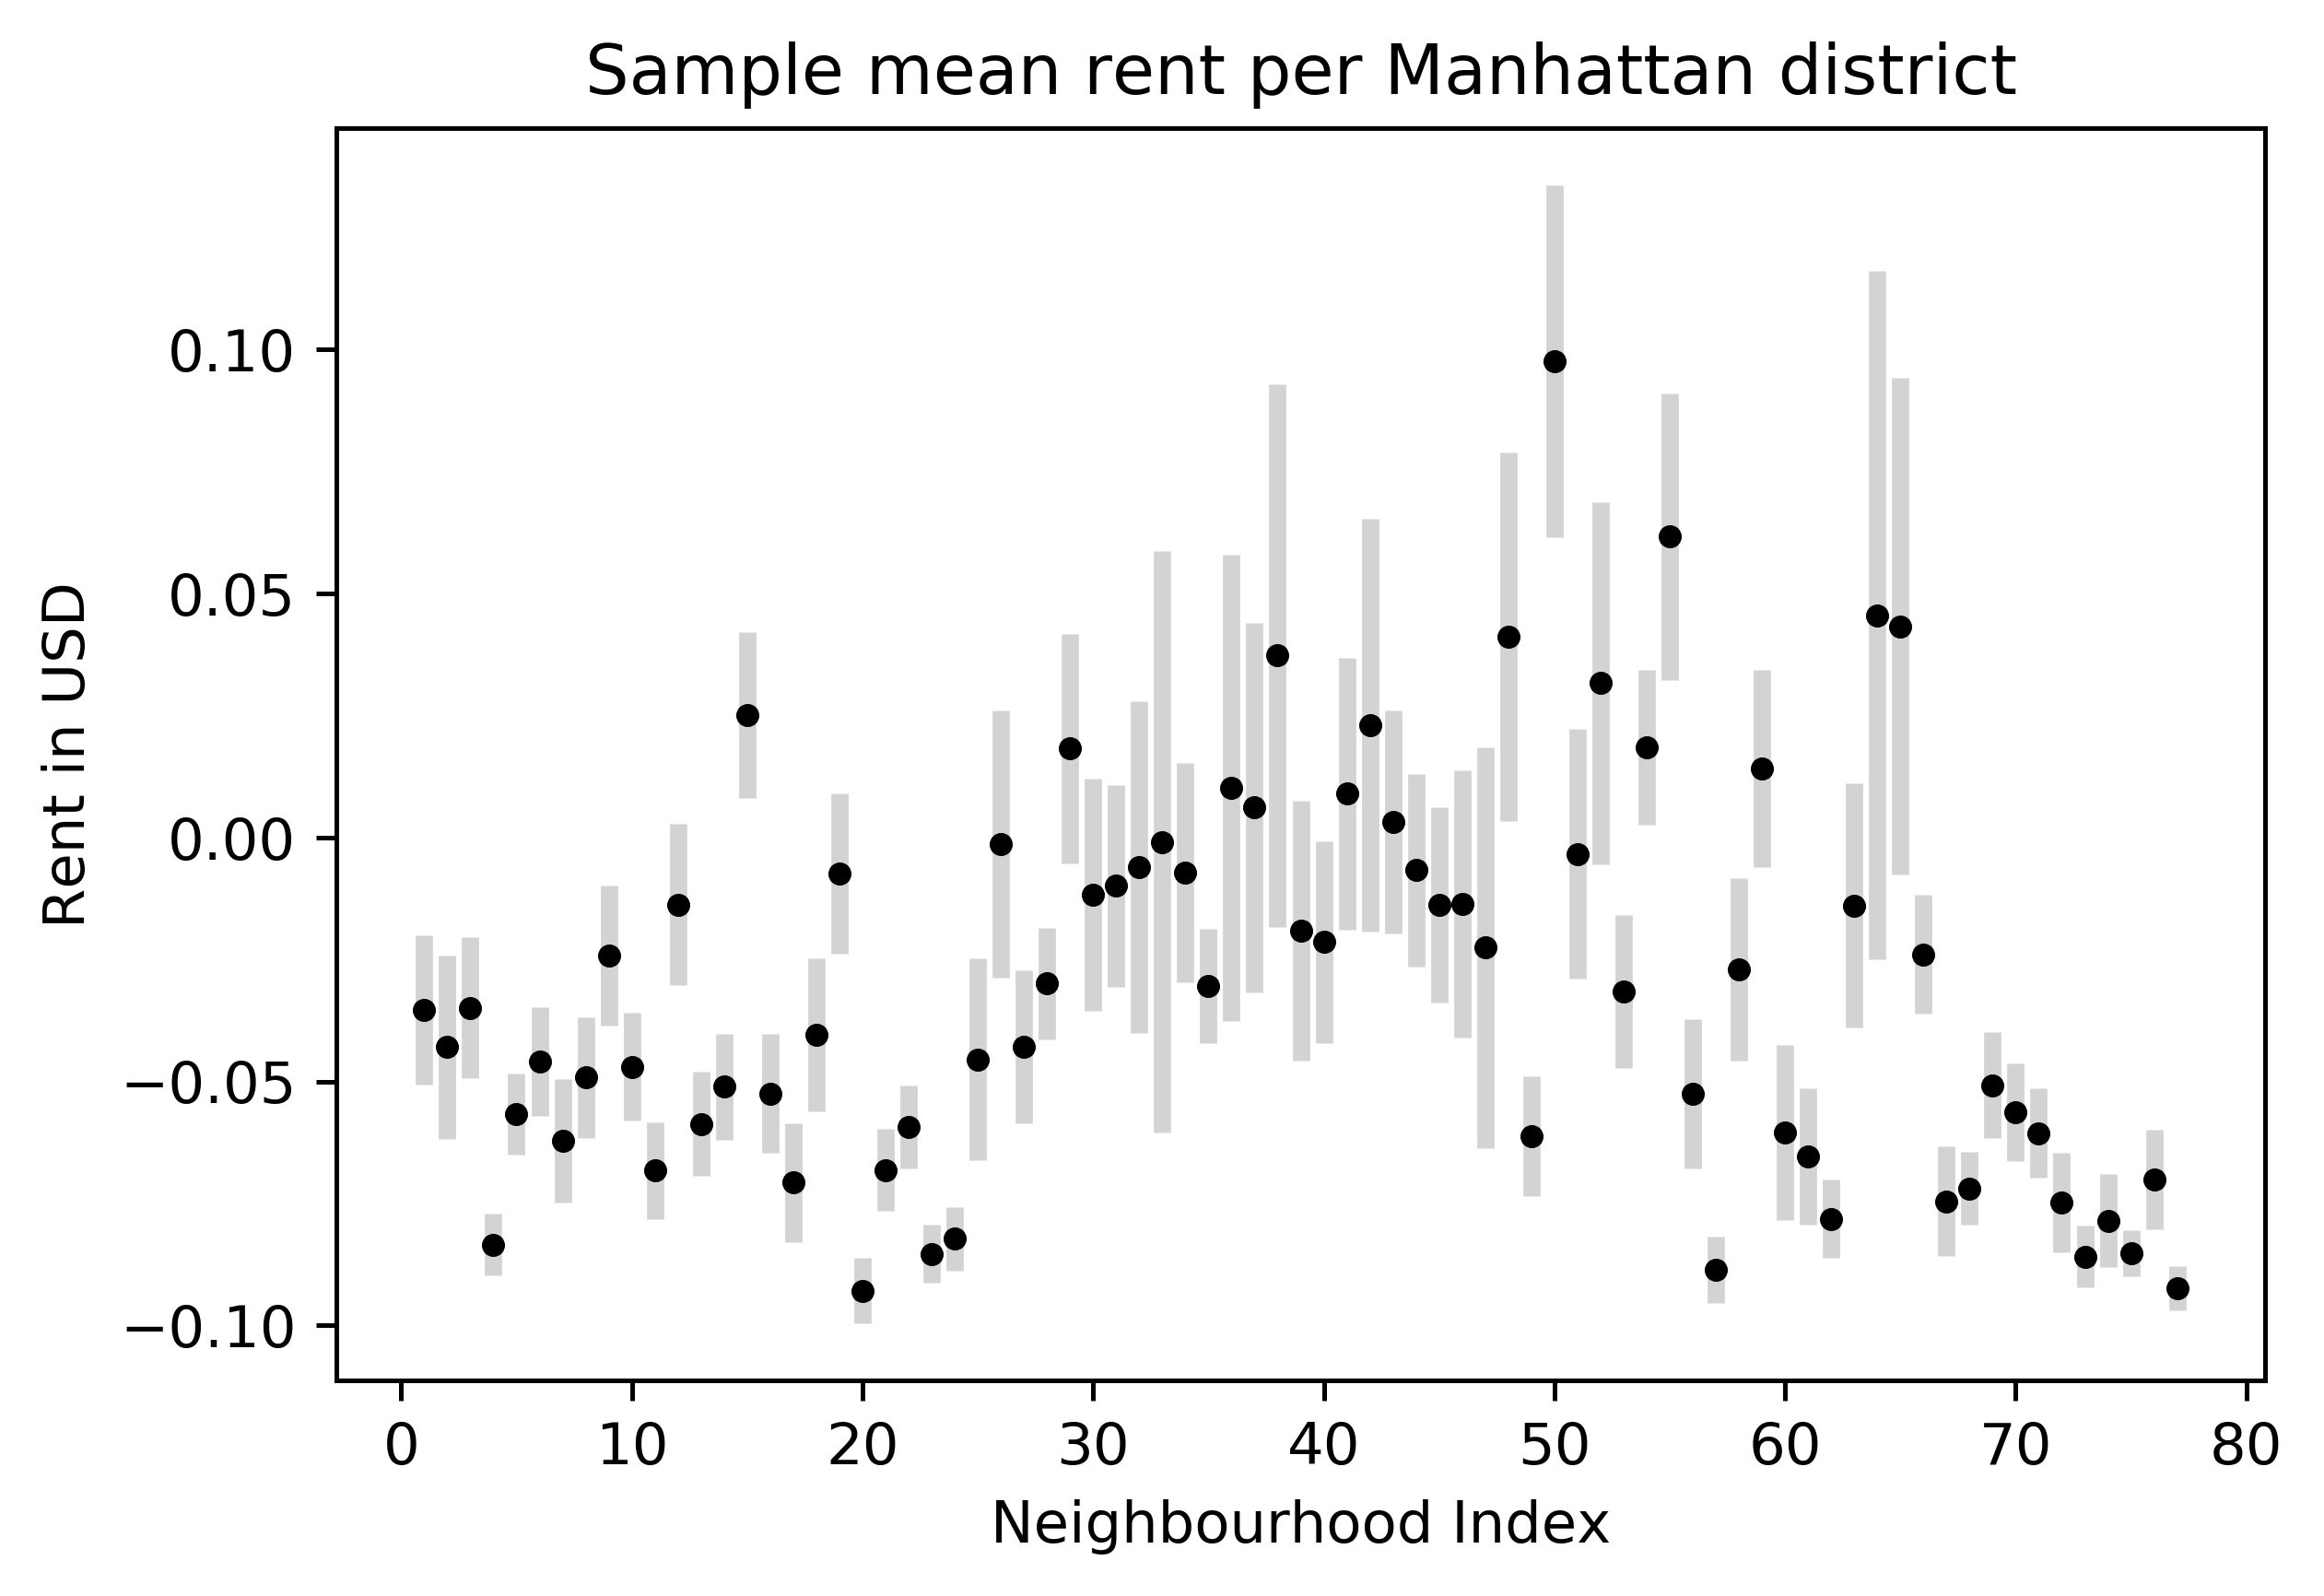

In [28]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Sample mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [29]:
def bootstrap(size = 10000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, frac = 1, replace = True)
    train_samples = train_samples.astype({'price':'float64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(frac = 1, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

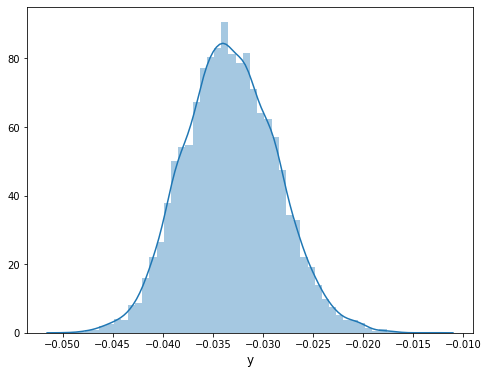

In [30]:
X, y = bootstrap()
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

In [31]:
np.std(y, axis = 1)

array([0.00461979, 0.0028577 , 0.00282085, 0.00243942, 0.00239718,
       0.00134712, 0.00398376, 0.0028297 , 0.0024388 , 0.00342753,
       0.0026503 , 0.00322497, 0.00224121, 0.00174956, 0.00369385,
       0.00193795, 0.0042807 , 0.00268916, 0.00268173, 0.00358949,
       0.00194735, 0.00252056, 0.00218138, 0.00380633, 0.00488095,
       0.00818314, 0.00645788, 0.00224421, 0.0019944 , 0.00251847,
       0.00157896, 0.00138576, 0.00166047, 0.00098307, 0.00170862,
       0.00223325, 0.00217456, 0.00301007, 0.00637045, 0.00137882,
       0.00206078, 0.00182577, 0.0010402 , 0.00250882, 0.00248495,
       0.00217947, 0.00244719, 0.00284947, 0.00115668, 0.00587324,
       0.00281906, 0.00280991, 0.00171535, 0.00298509, 0.00463197,
       0.00195858, 0.00124113, 0.00263117, 0.00219953, 0.00239667,
       0.00117042, 0.00125129, 0.00543563, 0.00550029, 0.01121097,
       0.00317754, 0.00374846, 0.00194707, 0.00193382, 0.00190188,
       0.0031291 , 0.00387047, 0.00204464, 0.00391192, 0.00164

In [32]:
print(mean)
print(np.mean(y, axis = 1))
print(mean - np.mean(y, axis = 1))

[-0.0667852   0.02149875 -0.07522548 -0.05571362 -0.02753495 -0.03877477
 -0.05090626 -0.01050578 -0.01328364 -0.07602403  0.00147476 -0.03507972
  0.06056211 -0.01559698 -0.03360591 -0.03013179 -0.05695942 -0.02226769
  0.02138875 -0.04875873 -0.00760965 -0.05099232 -0.01122393 -0.08126968
  0.04463389 -0.0716039  -0.06586071 -0.03981851  0.00223102 -0.04905388
 -0.01528884 -0.06570722 -0.06680058 -0.02704249 -0.08600026 -0.06976084
 -0.09282647 -0.06274504 -0.0011311   0.00983943 -0.00434124 -0.03931129
 -0.00245742 -0.00548845 -0.05886156 -0.00941933  0.02837011 -0.01863155
 -0.01550215 -0.00071091 -0.0080975  -0.06737248 -0.04094446 -0.05361897
 -0.0564105  -0.08753883 -0.06543673 -0.08269787 -0.06731582 -0.00160659
  0.10369202 -0.03661736 -0.05984612  0.02384924 -0.07953794 -0.08292603
 -0.00151679  0.09338645  0.00387621 -0.00887125  0.02719744  0.02075495
 -0.07252889 -0.07182526  0.01853928 -0.06101499 -0.02776742]
[-0.03325319 -0.04998505 -0.03912742 -0.08113352 -0.06385138 -

In [33]:
low = np.mean(y, axis = 1) - 1.96 * np.std(y, axis = 1)
high = np.mean(y, axis = 1) + 1.96 * np.std(y, axis = 1)

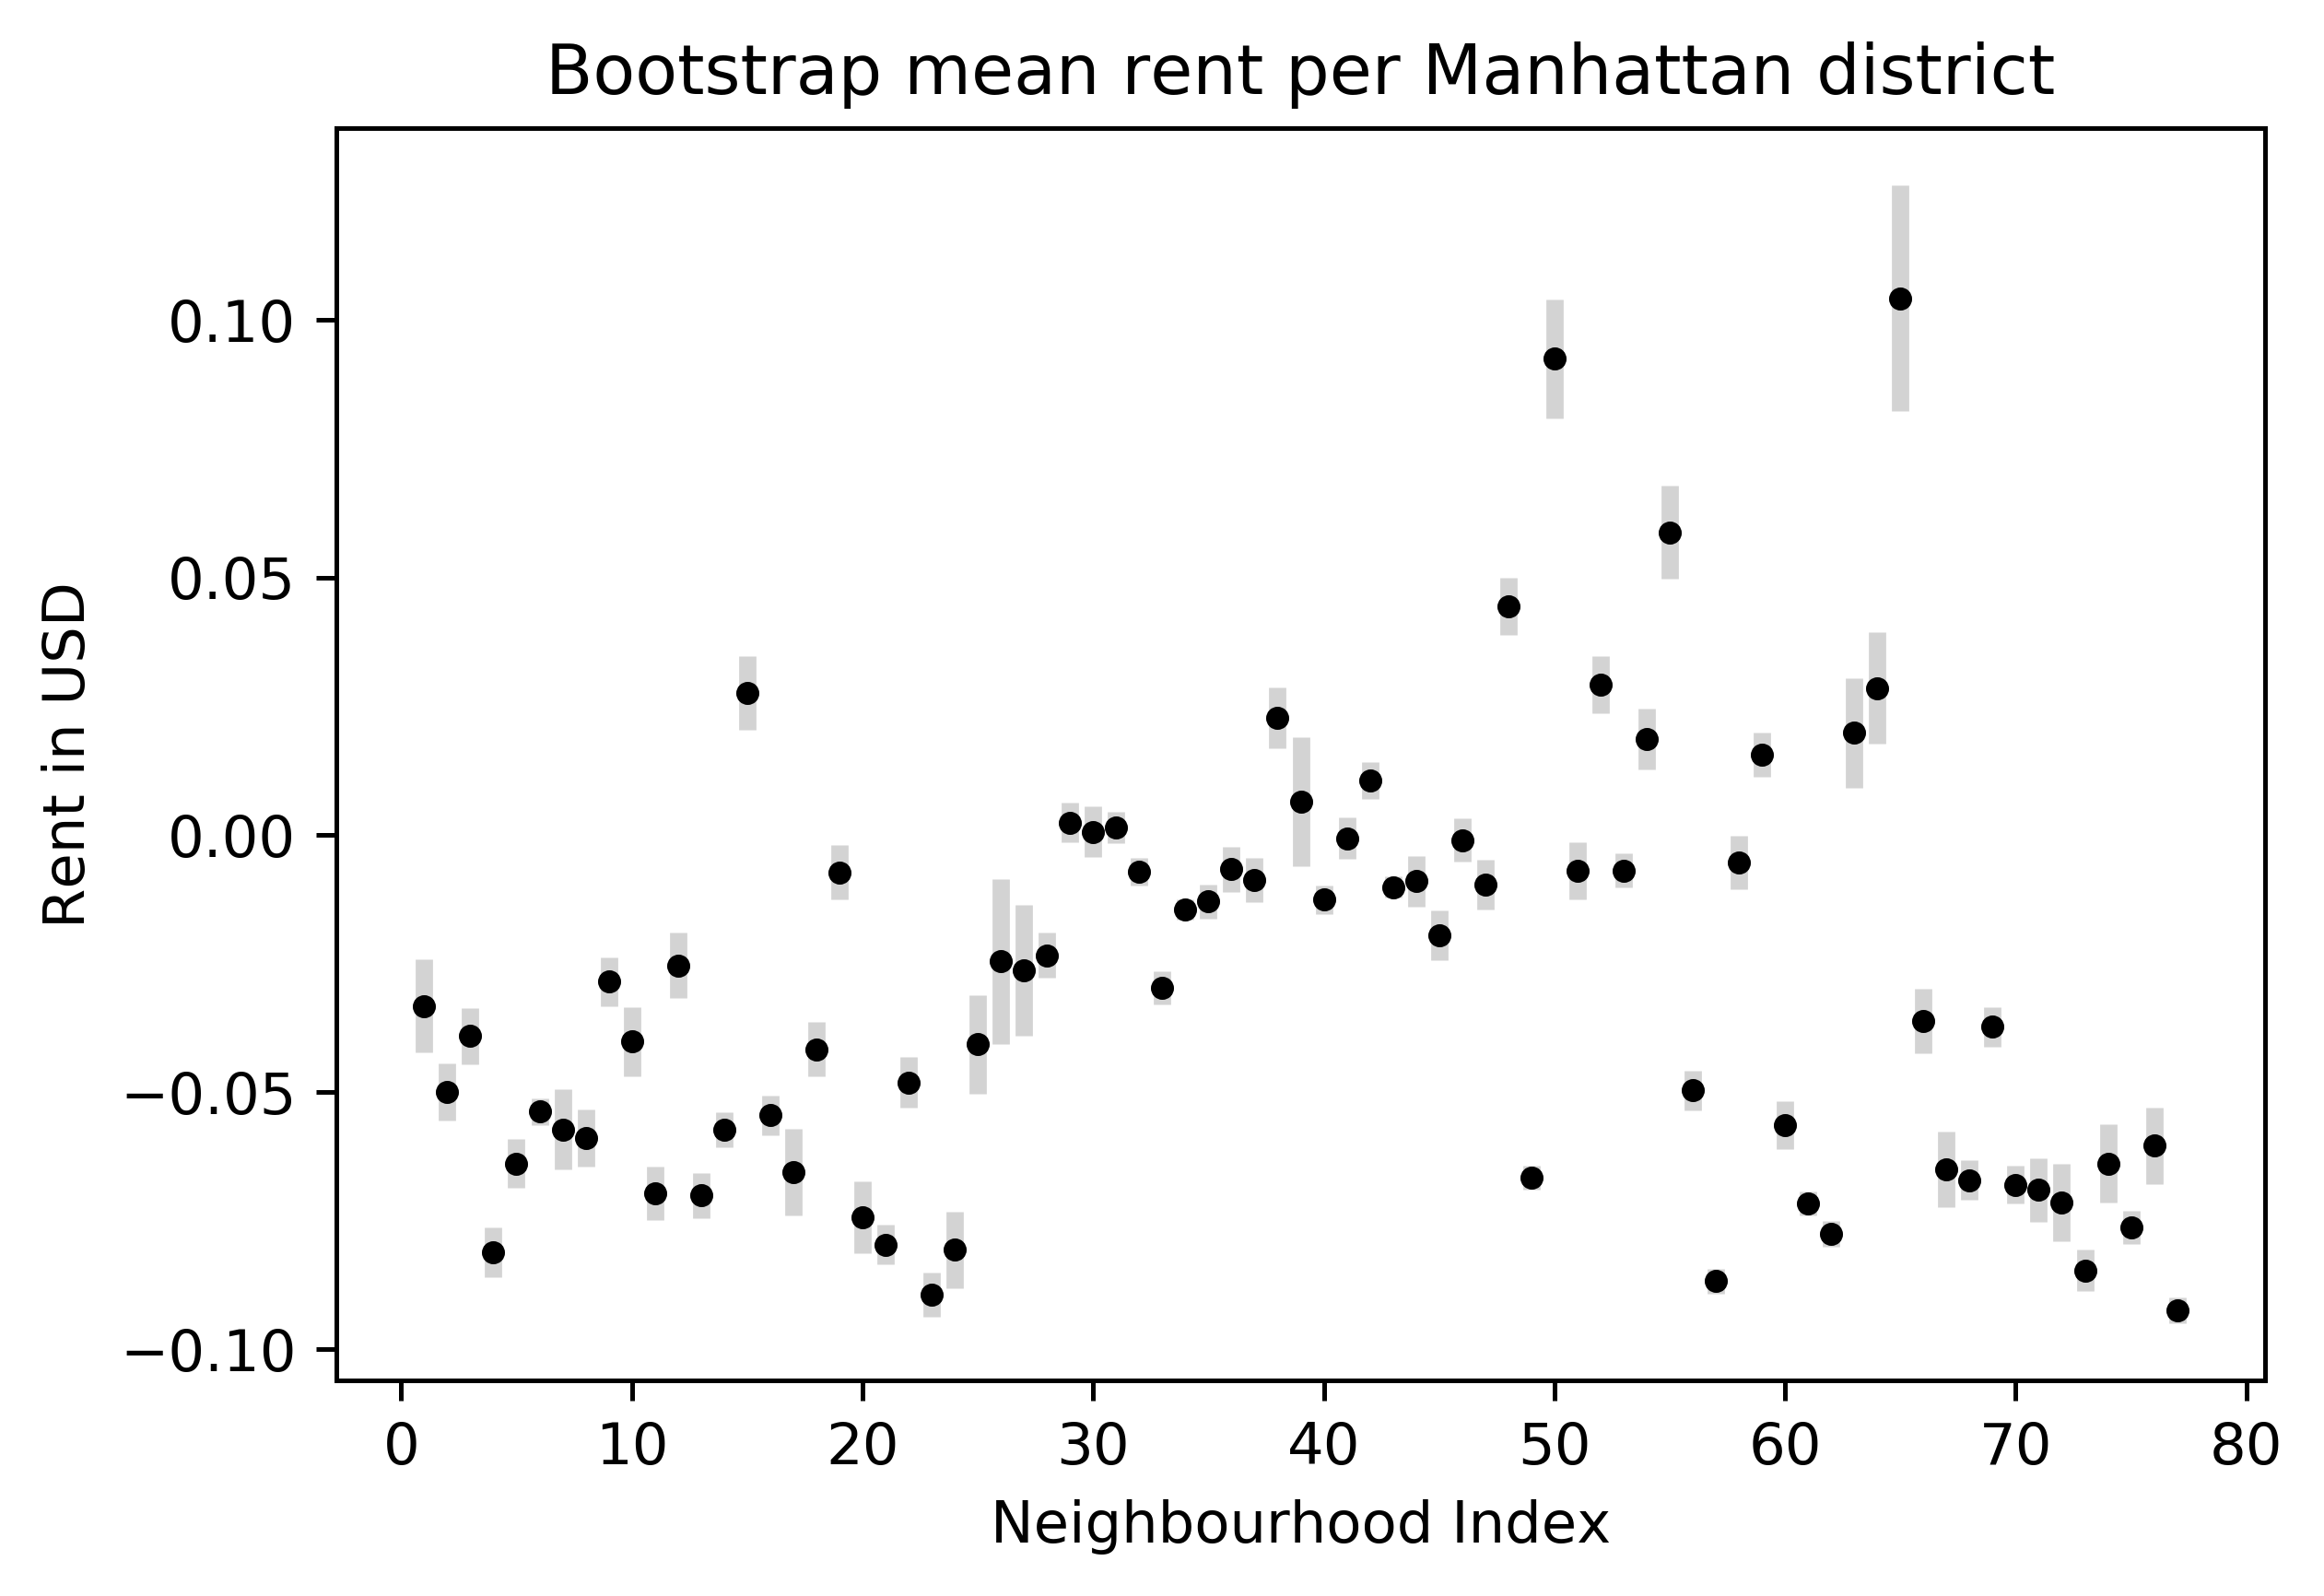

In [34]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrap mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(1, bootstraps.shape[0] + 1))
plt.show()

In [35]:
X_sets.shape

(77, 25, 10)

### GCN 

In [36]:
import torch
print('Torch version:', torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import scipy.sparse as sp

# import dgl
# from dgl.nn.pytorch import GraphConv
# import networkx as nx

Torch version: 1.5.1


In [37]:
# features = np.mean(y, axis = 1)
features = np.reshape(X_sets,(X_sets.shape[0], -1))
features = np.array(features, dtype='float')
# labels = mean
labels = np.array(mean, dtype = 'float')

# idx_train = list(np.array([1, 6, 7, 12]) - 1)
# idx_val = list(np.array([3, 5, 8, 10])  - 1)
# idx_test = list(np.array([2, 4, 9, 11])  - 1)

# produce a split for training, validation and testing
indices = np.arange(0, mean.shape[0]) # number of rows
np.random.shuffle(indices)
idx_train = indices[:59]
idx_val = indices[60:69]
idx_test = indices[70:]


# train_labels = [mean[i] for i in index_train]
# val_labels = [mean[i] for i in index_val]
# test_labels = [mean[i] for i in index_test]

adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')

# test = adj
# D = np.diag(np.power(np.sum(adj, axis = 1), -1))
# adj = np.dot(adj, D)

# adj = csr_matrix(adj)

# G = dgl.DGLGraph()
# adj_nx = nx.from_numpy_matrix(adj)
# G = dgl.from_networkx(adj_nx)

# print(features.shape)
# # print(features.T)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

adj = normalize(adj)
print(adj.shape)

(77, 77)


In [38]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
#     def __init__(self, nfeat, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
#         self.gc1 = GraphConvolution(nfeat, nclass)

        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x
    
# def accuracy(output, labels):
#     preds = output.max(1)[1].type_as(labels)
#     correct = preds.eq(labels).double()
#     correct = correct.sum()
#     return correct / len(labels)

In [39]:
EPOCHS = 5000

# Model and optimizer
model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4)
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
mse = nn.MSELoss()

features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 1000 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([59])) that is different to the input size (torch.Size([59, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1000 loss_train: 0.1754 loss_val: 0.0589 time: 0.0010s
Epoch: 2000 loss_train: 0.1252 loss_val: 0.0099 time: 0.0010s
Epoch: 3000 loss_train: 0.0228 loss_val: 0.0144 time: 0.0010s
Epoch: 4000 loss_train: 0.0078 loss_val: 0.0106 time: 0.0010s
Epoch: 5000 loss_train: 0.0074 loss_val: 0.0071 time: 0.0010s
Optimization Finished!
Total time elapsed: 5.3441s


D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test set results: loss= 0.0031


In [40]:
output = model(features, adj)

In [41]:
print(torch.mean(torch.abs(output.T-labels)))
mse(output[idx_test], labels[idx_test]) # print standardized MSE of model

tensor(0.0372, grad_fn=<MeanBackward0>)


tensor(0.0031, grad_fn=<MseLossBackward>)

In [42]:
np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy())

0.055866048

In [43]:
clone = pd.read_csv('neighbourhood_data.csv')['price']

In [44]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 1234.455139527314


### Pure Deep Sets

In [45]:
class DeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25):
        super(DeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 5),
            nn.ELU(inplace=True),
            nn.Linear(5, 1),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [54]:
# from tensorboardX import SummaryWriter
from torch import optim
from tqdm import tqdm


EPOCHS = 100

model = DeepSet()
if torch.cuda.is_available():
    model.cuda()

optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)


mse = nn.MSELoss()
# mse = nn.L1Loss()

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 10 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0010 loss_train: 0.0073 loss_val: 0.0077 time: 0.0040s
Epoch: 0020 loss_train: 0.0045 loss_val: 0.0052 time: 0.0030s
Epoch: 0030 loss_train: 0.0037 loss_val: 0.0064 time: 0.0030s
Epoch: 0040 loss_train: 0.0023 loss_val: 0.0043 time: 0.0060s
Epoch: 0050 loss_train: 0.0024 loss_val: 0.0039 time: 0.0040s
Epoch: 0060 loss_train: 0.0022 loss_val: 0.0040 time: 0.0030s
Epoch: 0070 loss_train: 0.0021 loss_val: 0.0042 time: 0.0040s
Epoch: 0080 loss_train: 0.0021 loss_val: 0.0043 time: 0.0040s
Epoch: 0090 loss_train: 0.0020 loss_val: 0.0043 time: 0.0045s
Epoch: 0100 loss_train: 0.0020 loss_val: 0.0043 time: 0.0040s
Optimization Finished!
Total time elapsed: 0.5416s
Test set results: loss= 0.0011


In [55]:
output = model(features)
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 740.6903043515416


### SetGCN (end to end trainable)

In [56]:
features.size()

torch.Size([77, 25, 10])

In [57]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time

class GraphDeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25, nhid = 64, dropout = 0.3):
        super(GraphDeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.gc1 = GraphConvolution(nhid, nhid)
        self.gc2 = GraphConvolution(nhid, 1)
        self.dropout = dropout
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, nhid),
            nn.ELU(inplace=True),
            nn.Linear(nhid, nhid),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input, adj):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        x = self.gc1(x, adj)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [61]:
EPOCHS = 1000

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

# Model and optimizer
model = GraphDeepSet()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0001)
mse = nn.MSELoss()


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 250 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0250 loss_train: 0.0095 loss_val: 0.0068 time: 0.0050s
Epoch: 0500 loss_train: 0.0073 loss_val: 0.0076 time: 0.0040s
Epoch: 0750 loss_train: 0.0038 loss_val: 0.0076 time: 0.0050s
Epoch: 1000 loss_train: 0.0036 loss_val: 0.0060 time: 0.0040s
Optimization Finished!
Total time elapsed: 4.2122s
Test set results: loss= 0.0010


In [62]:
output = model(features, adj)

In [63]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 685.257063330094


### MLP

In [65]:
class MLP(Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(features.shape[1], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = x
        return output



EPOCHS = 1500

# Model and optimizer
model2 = MLP()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3, weight_decay=0.001)
mse = nn.MSELoss()
# mse = nn.L1Loss()

features = np.reshape(X_sets,(X_sets.shape[0], -1))
features = np.array(features, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model2.train()
    optimizer.zero_grad()
    output = model2(features)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 500 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model2.eval()
    output = model2(features)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0500 loss_train: 0.0014 loss_val: 0.0792 time: 0.0070s
Epoch: 1000 loss_train: 0.0014 loss_val: 0.1015 time: 0.0050s
Epoch: 1500 loss_train: 0.0014 loss_val: 0.0969 time: 0.0060s
Optimization Finished!
Total time elapsed: 8.6076s
Test set results: loss= 0.0269


In [66]:
output = model2(features)

In [67]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 3623.7158651678474


### Produce RMSE plots in USD for method versus baseline

In [ ]:
num_test_per_sample = 10
samples_num_list = [2,5,10,15,20,25,30,40]


def trials():
    indices = np.arange(0, mean.shape[0]) # number of rows
    np.random.shuffle(indices)
    idx_train = indices[:59]
    idx_val = indices[60:69]
    idx_test = indices[70:]
    results_model = []
    results_baseline = []
    adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')
    adj = normalize(adj)
    
    
    def train(epoch):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        output = model(features, adj)
        loss_train = mse(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()

        loss_val = mse(output[idx_val], labels[idx_val])
#         if((epoch + 1) % 1000 == 0):
#             print('Epoch: {:04d}'.format(epoch+1),
#                   'loss_train: {:.4f}'.format(loss_train.item()),
#                   'loss_val: {:.4f}'.format(loss_val.item()),
#                   'time: {:.4f}s'.format(time.time() - t))

    def test():
        model.eval()
        output = model(features, adj)
        loss_test = mse(output[idx_test], labels[idx_test])
#         print("Test set results:",
#               "loss= {:.4f}".format(loss_test.item()))
    
    for sample in samples_num_list:
        for i in range(num_test_per_sample):
            X, y = trainSet(sample, 200)
            X_train = X
            y_train = y

            features = np.mean(y, axis = 1)
            features = np.reshape(features,(features.shape[0], -1))
            features = np.array(features, dtype='float')
            labels = np.array(mean, dtype = 'float')

            EPOCHS = 5000

            # Model and optimizer
            model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4)
            # model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
            mse = nn.MSELoss()

            features = torch.FloatTensor(features)
            labels = torch.FloatTensor(mean)
            adj = torch.FloatTensor(adj)
            idx_train = torch.LongTensor(idx_train)
            idx_val = torch.LongTensor(idx_val)
            idx_test = torch.LongTensor(idx_test)

            # Train model
            t_total = time.time()
            for epoch in range(EPOCHS):
                train(epoch)
                
            output = model(features, adj)

            results_model.append(non_standardized['price'].std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))
            results_baseline.append(non_standardized['price'].std() * np.sqrt(mse(features[idx_test], labels[idx_test]).detach().numpy()))

    return results_model, results_baseline

model, baseline = trials()

In [ ]:
model_errors = np.array(model).reshape(len(samples_num_list),num_test_per_sample)
baseline_errors = np.array(baseline).reshape(len(samples_num_list),num_test_per_sample)

model_means = np.mean(model_errors, axis = 1)
baseline_means = np.mean(baseline_errors, axis = 1)
model_std = np.std(model_errors, axis = 1)
baseline_std = np.std(baseline_errors, axis = 1)

In [ ]:
plt.figure(figsize=(8,6))
plt.errorbar(samples_num_list, model_means, yerr=model_std, fmt='o', color='darkblue', ecolor='lightblue', elinewidth=3)
plt.errorbar(samples_num_list, baseline_means, yerr=baseline_std, fmt='o', color='darkred', ecolor='salmon', elinewidth=3)
plt.xticks(samples_num_list)
plt.xlabel("Number of samples at each neighbourhood", fontsize=16)
plt.ylabel("Root mean squared error in US$", fontsize=16)
plt.legend(["Proposed Model", "Local Averaging"], fontsize=16)
plt.title("RMSE of Rental Price Prediction", fontsize=18, fontweight='bold')
# plt.savefig('experiment_1.png', dpi=450, facecolor='w', edgecolor='w')
plt.show()